<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

# Python for Asset Management

### Machine Learning

&copy; Dr. Yves J. Hilpisch | The Python Quants GmbH

http://tpq.io | [training@tpq.io](mailto:trainin@tpq.io) | [@dyjh](http://twitter.com/dyjh)

## Machine Learning

Topics of interest include:

* deep learning
* return predictions
* mixed features
* multiple labels
* vectorized backtesting
 * single instruments
 * multiple instruments
* train-test splits
* adding financial features
* adding typical risk factors
* rolling train-test approach

# Imports & Configurations

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
from pylab import mpl, plt

In [3]:
np.random.seed(1000)
plt.style.use('seaborn')
#pd.set_option('precision', 4)
pd.reset_option('all')
np.set_printoptions(suppress=True, precision=4)
%config InlineBackend.figure_format = 'svg'

/opt/homebrew/Caskroom/miniconda/base/envs/finance/lib/python3.9/site-packages/pandas/_config/config.py:653: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead.
  warnings.warn(d.msg, FutureWarning)
/opt/homebrew/Caskroom/miniconda/base/envs/finance/lib/python3.9/site-packages/pandas/_config/config.py:653: FutureWarning: 
: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.

  warnings.warn(d.msg, FutureWarning)


## The Data

In [4]:
raw = pd.read_csv('http://hilpisch.com/aiif_eikon_eod_data.csv',
                  index_col=0, parse_dates=True).dropna()

In [5]:
raw.columns

Index(['AAPL.O', 'MSFT.O', 'INTC.O', 'AMZN.O', 'GS.N', 'SPY', '.SPX', '.VIX',
       'EUR=', 'XAU=', 'GDX', 'GLD'],
      dtype='object')

In [6]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2010-01-04 to 2019-12-31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL.O  2516 non-null   float64
 1   MSFT.O  2516 non-null   float64
 2   INTC.O  2516 non-null   float64
 3   AMZN.O  2516 non-null   float64
 4   GS.N    2516 non-null   float64
 5   SPY     2516 non-null   float64
 6   .SPX    2516 non-null   float64
 7   .VIX    2516 non-null   float64
 8   EUR=    2516 non-null   float64
 9   XAU=    2516 non-null   float64
 10  GDX     2516 non-null   float64
 11  GLD     2516 non-null   float64
dtypes: float64(12)
memory usage: 255.5 KB


In [7]:
symbols = raw.columns[:3]
symbols

Index(['AAPL.O', 'MSFT.O', 'INTC.O'], dtype='object')

In [8]:
data = pd.DataFrame(raw[symbols])

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2010-01-04 to 2019-12-31
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL.O  2516 non-null   float64
 1   MSFT.O  2516 non-null   float64
 2   INTC.O  2516 non-null   float64
dtypes: float64(3)
memory usage: 78.6 KB


In [10]:
# data = data.resample('1w').last()

In [11]:
rets = np.log(data / data.shift(1))

In [12]:
rets.dropna(inplace=True)

In [13]:
rets.head()

,AAPL.O,MSFT.O,INTC.O
Date,,,
2010-01-05,0.001727,0.000323,-0.000479
2010-01-06,-0.016034,-0.006156,-0.003360
2010-01-07,-0.001850,-0.010389,-0.009662
2010-01-08,0.006626,0.006807,0.011103
2010-01-11,-0.008861,-0.012802,0.005744


In [14]:
lags = 3

In [15]:
# returns features only
# returns + risk factors features
def create_lags(rets):
    global cols
    cols = []
    for sym in rets.columns:
        for lag in range(1, lags + 1):
            col = f'{sym}_lag_{lag}'
            rets[col] = rets[sym].shift(lag)
            cols.append(col)

In [16]:
create_lags(rets)

In [17]:
cols

['AAPL.O_lag_1',
 'AAPL.O_lag_2',
 'AAPL.O_lag_3',
 'MSFT.O_lag_1',
 'MSFT.O_lag_2',
 'MSFT.O_lag_3',
 'INTC.O_lag_1',
 'INTC.O_lag_2',
 'INTC.O_lag_3']

In [18]:
# rets.head()

In [19]:
rets.dropna(inplace=True)

In [20]:
# rets.head()

In [21]:
rets[cols] = (rets[cols] - rets[cols].mean()) / rets[cols].std()

In [73]:
rets

,AAPL.O,MSFT.O,INTC.O,AAPL.O_lag_1,AAPL.O_lag_2,AAPL.O_lag_3,MSFT.O_lag_1,MSFT.O_lag_2,MSFT.O_lag_3,INTC.O_lag_1,INTC.O_lag_2,INTC.O_lag_3
Date,,,,,,,,,,,,
2010-01-08,0.006626,0.006807,0.011103,-0.169357,-1.040946,0.051154,-0.769983,-0.474832,-0.022852,-0.651304,-0.244265,-0.058023
2010-01-11,-0.008861,-0.012802,0.005744,0.351969,-0.168786,-1.040999,0.429462,-0.770082,-0.474791,0.690253,-0.651443,-0.244144
2010-01-12,-0.011440,-0.006629,-0.016459,-0.600509,0.352437,-0.168838,-0.938312,0.429409,-0.770041,0.344041,0.690171,-0.651327
2010-01-13,0.014007,0.009269,0.016937,-0.759150,-0.599853,0.352385,-0.507756,-0.938418,0.429452,-1.090458,0.343944,0.690303
2010-01-14,-0.005808,0.019900,0.024506,0.805892,-0.758463,-0.599905,0.601145,-0.507845,-0.938377,1.067123,-1.090616,0.344072
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,0.000950,-0.000191,0.003034,0.939945,-0.182505,0.006453,-0.045357,0.712013,0.557507,0.279057,1.067057,0.859623
2019-12-26,0.019646,0.008163,0.006877,0.002882,0.940297,-0.182557,-0.058652,-0.045429,0.712056,0.168958,0.278957,1.067194
2019-12-27,-0.000380,0.001826,0.004337,1.152704,0.003419,0.940246,0.524054,-0.058724,-0.045387,0.417246,0.168854,0.279085


In [22]:
# rets.head()

## Predicting Returns

In [23]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, accuracy_score

In [24]:
model = MLPRegressor(hidden_layer_sizes=1 * [128,],
                    random_state=100, shuffle=False)

### In-Sample Training-Testing

In [74]:
rets[symbols]

,AAPL.O,MSFT.O,INTC.O
Date,,,
2010-01-08,0.006626,0.006807,0.011103
2010-01-11,-0.008861,-0.012802,0.005744
2010-01-12,-0.011440,-0.006629,-0.016459
2010-01-13,0.014007,0.009269,0.016937
2010-01-14,-0.005808,0.019900,0.024506
...,...,...,...
2019-12-24,0.000950,-0.000191,0.003034
2019-12-26,0.019646,0.008163,0.006877
2019-12-27,-0.000380,0.001826,0.004337


In [25]:
model.fit(rets[cols], rets[symbols])

MLPRegressor(hidden_layer_sizes=[128], random_state=100, shuffle=False)

In [26]:
pred = model.predict(rets[cols])
pred[:5]

array([[-0.0137,  0.0162, -0.0234],
       [ 0.0406, -0.0063,  0.009 ],
       [ 0.0266, -0.0003, -0.0235],
       [-0.0034, -0.0182,  0.012 ],
       [-0.0257, -0.0114,  0.008 ]])

In [27]:
rets_ = rets[symbols].copy()
rets_.iloc[:] = pred
rets_.head()

,AAPL.O,MSFT.O,INTC.O
Date,,,
2010-01-08,-0.013729,0.016190,-0.023362
2010-01-11,0.040562,-0.006292,0.009000
2010-01-12,0.026550,-0.000317,-0.023494
2010-01-13,-0.003366,-0.018183,0.012019
2010-01-14,-0.025743,-0.011406,0.007968


In [28]:
mean_squared_error(rets[symbols], rets_)

0.001380490227268283

In [29]:
for sym in symbols:
    mse = mean_squared_error(rets[sym], rets_[sym])
    print(f'{sym}: MSE={mse}')

AAPL.O: MSE=0.0015020808279700185
MSFT.O: MSE=0.0013334762950669504
INTC.O: MSE=0.0013059135587678804


In [30]:
np.sign(rets_).head()

,AAPL.O,MSFT.O,INTC.O
Date,,,
2010-01-08,-1.0,1.0,-1.0
2010-01-11,1.0,-1.0,1.0
2010-01-12,1.0,-1.0,-1.0
2010-01-13,-1.0,-1.0,1.0
2010-01-14,-1.0,-1.0,1.0


In [31]:
for sym in symbols:
    acc = accuracy_score(np.sign(rets[sym]), np.sign(rets_[sym]))
    print(f'{sym}: ACC={acc}')

AAPL.O: ACC=0.5035828025477707
MSFT.O: ACC=0.5079617834394905
INTC.O: ACC=0.5019904458598726


In [32]:
strat = np.sign(rets_) * rets[symbols]

In [33]:
strat.head()

,AAPL.O,MSFT.O,INTC.O
Date,,,
2010-01-08,-0.006626,0.006807,-0.011103
2010-01-11,-0.008861,0.012802,0.005744
2010-01-12,-0.011440,0.006629,0.016459
2010-01-13,-0.014007,-0.009269,0.016937
2010-01-14,0.005808,-0.019900,0.024506


In [34]:
strat.sum().apply(np.exp)

AAPL.O    0.987139
MSFT.O    1.483719
INTC.O    1.122294
dtype: float64

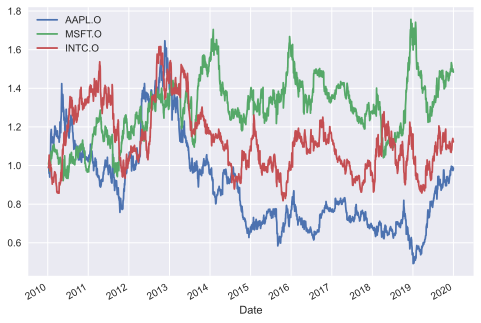

In [35]:
strat.cumsum().apply(np.exp).plot();  # in-sample performance

In [36]:
weights = len(symbols) * [1 / len(symbols)]

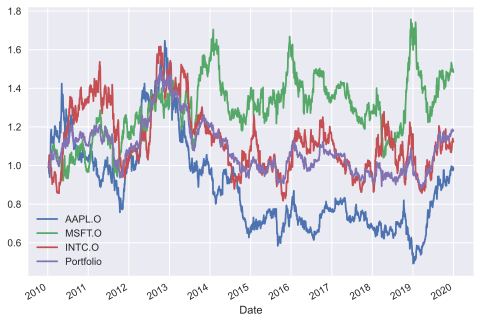

In [37]:
strat.cumsum().apply(np.exp).plot()
(strat * weights).cumsum().sum(axis=1).apply(np.exp).plot(label='Portfolio')
plt.legend();  # in-sample performance

## Train-Test Split

In [38]:
split = int(len(rets) * 0.7)

In [39]:
train = rets.iloc[:split].copy()

In [40]:
test = rets.iloc[split:].copy()

In [41]:
model.fit(train[cols], train[symbols])

MLPRegressor(hidden_layer_sizes=[128], random_state=100, shuffle=False)

In [42]:
pred = model.predict(train[cols])  # in-sample
rets_ = train[symbols].copy()
rets_[:] = pred

In [43]:
for sym in symbols:    
    acc = accuracy_score(np.sign(train[sym]), np.sign(rets_[sym]))
    print(f'{sym}: ACC={acc:.3f}')

AAPL.O: ACC=0.506
MSFT.O: ACC=0.518
INTC.O: ACC=0.497


In [44]:
pred = model.predict(test[cols])  # out-of-sample
rets_ = test[symbols].copy()
rets_[:] = pred

In [45]:
for sym in symbols:    
    acc = accuracy_score(np.sign(test[sym]), np.sign(rets_[sym]))
    print(f'{sym}: ACC={acc:.3f}')  # out-of-sample

AAPL.O: ACC=0.499
MSFT.O: ACC=0.500
INTC.O: ACC=0.504


In [46]:
strat = np.sign(rets_) * test[symbols]

In [47]:
strat.head()

,AAPL.O,MSFT.O,INTC.O
Date,,,
2017-01-03,-0.002845,-0.007056,-0.009057
2017-01-04,-0.001120,-0.004484,-0.005205
2017-01-05,0.005072,-0.000000,0.001649
2017-01-06,0.011087,-0.008630,0.003570
2017-01-09,-0.009118,0.003188,-0.003557


In [48]:
strat.sum().apply(np.exp)  # out-of-sample

AAPL.O    0.799109
MSFT.O    1.081172
INTC.O    0.764213
dtype: float64

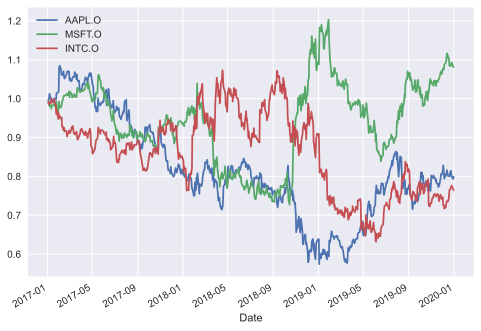

In [49]:
strat.cumsum().apply(np.exp).plot();  # out-of-sample

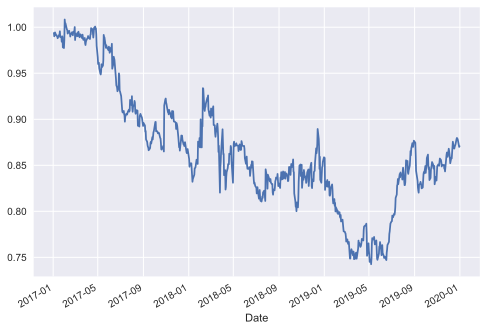

In [50]:
(strat / len(symbols)).cumsum().sum(axis=1).apply(np.exp).plot();  # out-of-sample

## Rolling Train-Test Approach

In [51]:
rets.index

DatetimeIndex(['2010-01-08', '2010-01-11', '2010-01-12', '2010-01-13',
               '2010-01-14', '2010-01-15', '2010-01-19', '2010-01-20',
               '2010-01-21', '2010-01-22',
               ...
               '2019-12-17', '2019-12-18', '2019-12-19', '2019-12-20',
               '2019-12-23', '2019-12-24', '2019-12-26', '2019-12-27',
               '2019-12-30', '2019-12-31'],
              dtype='datetime64[ns]', name='Date', length=2512, freq=None)

### Weekly Testing

In [52]:
weeks = pd.date_range(rets.index[0], rets.index[-1], freq='w')

In [53]:
start = 52

In [54]:
pred

array([[-0.0005, -0.0026, -0.021 ],
       [ 0.0258,  0.0072,  0.0215],
       [ 0.0077, -0.0051, -0.03  ],
       ...,
       [ 0.0427, -0.0418, -0.0006],
       [-0.0026,  0.0068,  0.019 ],
       [ 0.0182, -0.0155, -0.0049]])

In [55]:
%%time
rets_ = pd.DataFrame()
for w in weeks[start:start + 250]:
    train = rets.loc[:w]
    model.fit(train[cols], train[symbols])
    test = rets.loc[w:w + weeks.freq]
    pred = model.predict(test[cols])  
    df = pd.DataFrame(pred, columns=symbols, index=test.index)
    rets_ = rets_.append(df)
# when dealing with daily base data

<timed exec>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<timed exec>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<timed exec>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<timed exec>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<timed exec>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<timed exec>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<timed exec>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

CPU times: user 12.1 s, sys: 331 ms, total: 12.4 s
Wall time: 12.4 s


<timed exec>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<timed exec>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


In [56]:
train.index

DatetimeIndex(['2010-01-08', '2010-01-11', '2010-01-12', '2010-01-13',
               '2010-01-14', '2010-01-15', '2010-01-19', '2010-01-20',
               '2010-01-21', '2010-01-22',
               ...
               '2015-10-05', '2015-10-06', '2015-10-07', '2015-10-08',
               '2015-10-09', '2015-10-12', '2015-10-13', '2015-10-14',
               '2015-10-15', '2015-10-16'],
              dtype='datetime64[ns]', name='Date', length=1454, freq=None)

In [57]:
test.index

DatetimeIndex(['2015-10-19', '2015-10-20', '2015-10-21', '2015-10-22',
               '2015-10-23'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [58]:
rets_.head()  # out-of-sample

,AAPL.O,MSFT.O,INTC.O
Date,,,
2011-01-10,-0.087805,-0.166936,-0.156592
2011-01-11,-0.090200,-0.126507,0.137908
2011-01-12,0.059906,0.062021,0.067525
2011-01-13,-0.075810,-0.005770,0.021941
2011-01-14,0.111969,0.031154,0.037944


In [59]:
strat = np.sign(rets_) * rets.loc[
        rets_.index[0]:rets_.index[-1]][symbols]

In [60]:
strat.head()

,AAPL.O,MSFT.O,INTC.O
Date,,,
2011-01-10,-0.018672,0.013376,-0.001451
2011-01-11,0.002383,0.003906,0.017250
2011-01-12,0.008104,0.015532,0.011924
2011-01-13,-0.003652,0.012690,-0.000587
2011-01-14,0.008067,0.003894,-0.009913


In [61]:
strat.sum().apply(np.exp)  # out-of-sample

AAPL.O    0.635797
MSFT.O    0.538085
INTC.O    0.817368
dtype: float64

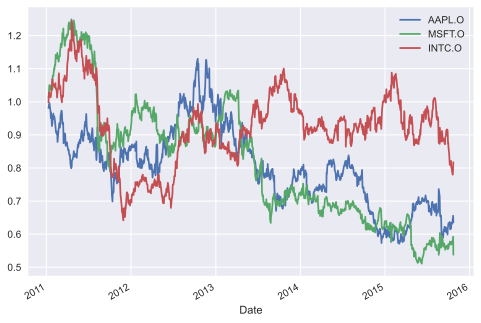

In [62]:
strat.cumsum().apply(np.exp).plot();  # out-of-sample

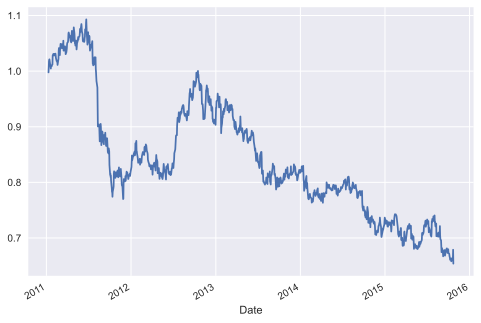

In [63]:
(strat / len(symbols)).cumsum().sum(axis=1).apply(np.exp).plot();  # out-of-sample

### Daily Testing

In [64]:
start = 252

In [65]:
%%time
rets_ = pd.DataFrame()
for d in range(start, start + 750):
    train = rets.iloc[:d]
    model.fit(train[cols], train[symbols])
    test = rets.iloc[d:d + 1]
    pred = model.predict(test[cols])  
    df = pd.DataFrame(pred, columns=symbols, index=test.index)
    rets_ = rets_.append(df)

<timed exec>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<timed exec>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<timed exec>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<timed exec>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<timed exec>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<timed exec>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<timed exec>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

CPU times: user 30.2 s, sys: 857 ms, total: 31 s
Wall time: 31.1 s


<timed exec>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<timed exec>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<timed exec>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


In [66]:
train.index

DatetimeIndex(['2010-01-08', '2010-01-11', '2010-01-12', '2010-01-13',
               '2010-01-14', '2010-01-15', '2010-01-19', '2010-01-20',
               '2010-01-21', '2010-01-22',
               ...
               '2013-12-16', '2013-12-17', '2013-12-18', '2013-12-19',
               '2013-12-20', '2013-12-23', '2013-12-24', '2013-12-26',
               '2013-12-27', '2013-12-30'],
              dtype='datetime64[ns]', name='Date', length=1001, freq=None)

In [67]:
test.index

DatetimeIndex(['2013-12-31'], dtype='datetime64[ns]', name='Date', freq=None)

In [68]:
strat = np.sign(rets_) * rets.loc[
        rets_.index[0]:rets_.index[-1]][symbols]

In [69]:
strat.head()

,AAPL.O,MSFT.O,INTC.O
Date,,,
2011-01-07,0.007136,-0.007663,0.005310
2011-01-10,-0.018672,0.013376,-0.001451
2011-01-11,0.002383,0.003906,0.017250
2011-01-12,0.008104,0.015532,0.011924
2011-01-13,-0.003652,0.012690,-0.000587


In [70]:
strat.sum().apply(np.exp)  # out-of-sample

AAPL.O    0.873313
MSFT.O    0.671235
INTC.O    0.965199
dtype: float64

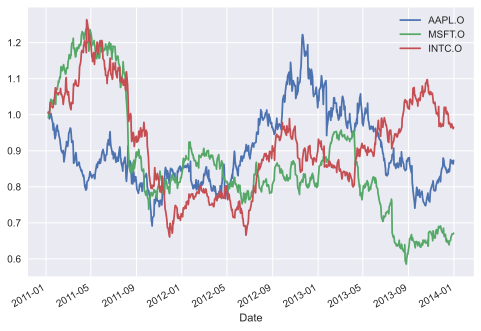

In [71]:
strat.cumsum().apply(np.exp).plot();  # out-of-sample

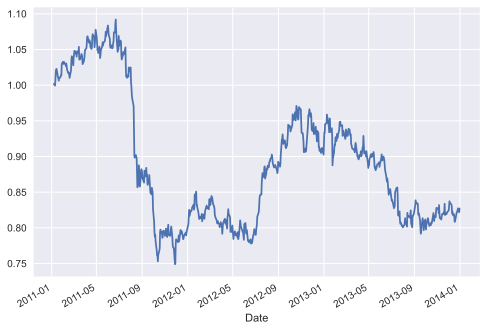

In [72]:
(strat / len(symbols)).cumsum().sum(axis=1).apply(np.exp).plot();  # out-of-sample

<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

<a href="http://tpq.io" target="_blank">http://tpq.io</a> | <a href="http://twitter.com/dyjh" target="_blank">@dyjh</a> | <a href="mailto:training@tpq.io">training@tpq.io</a>